<a href="https://colab.research.google.com/github/AlmaRosa13/Metodos_Numericos/blob/main/Cap4_Interpolaci%C3%B3n%26Aproximaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

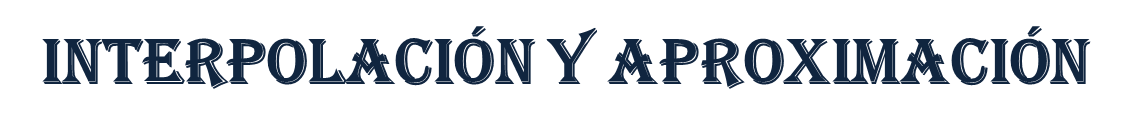

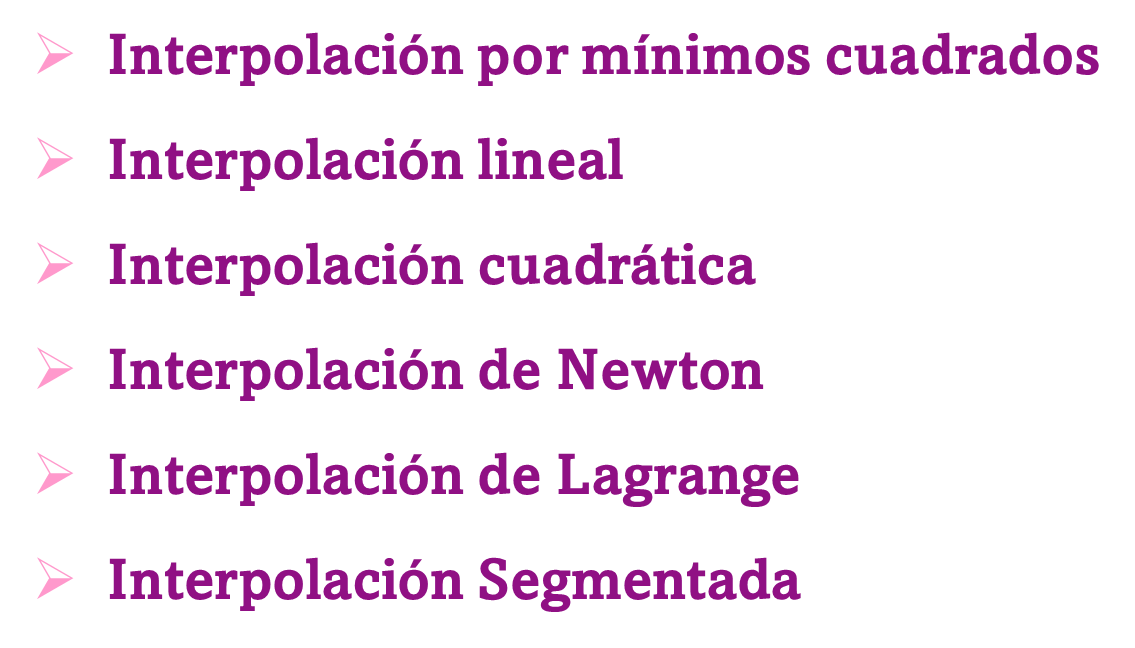

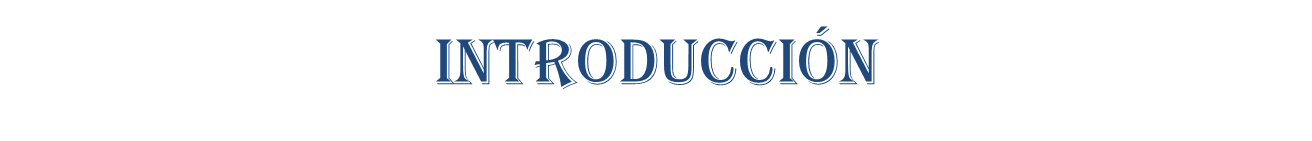

El resultado de observaciones de un proceso de laboratorio o industrial genera una lista de datos que forman tablas.

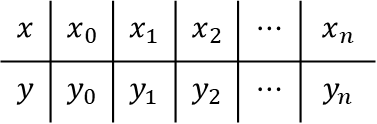

Por ejemplo, la medición de la densidad del carbonato de sodio a distintas concentraciones a temperatura constante genera los siguientes datos.

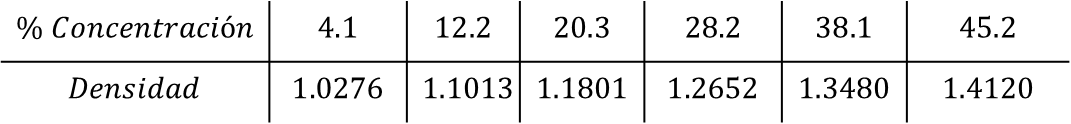

Los datos expresan la relación de la densidad (variable dependiente) y la concentración (variable independiente). Es decir que el valor de y depende del valor de $x$. Si deseamos conocer el valor de la variable dependiente para un valor de la variable independiente que no está en la tabla de datos, se requiere hacer una estimación. \\

La estimación puede lograrse de dos maneras, ajustando una función que toque todos los puntos de la tabla (interpolación) o ajustando una función que minimice las distancias del punto tabulado a la función (regresión). \\

La función de la interpolación pasa por cada punto de la tabla, la función de la regresión no necesariamente pasa lo más cerca de los puntos. Esto es, si sustituimos $x_i$ en $f(x)$, el resultado es $y_i$ para la interpolación y para la regresión obtenemos $y_i$ corregida.

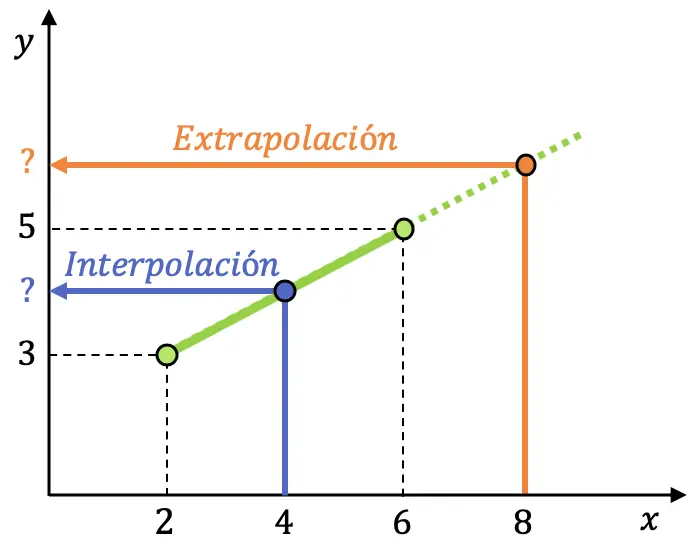


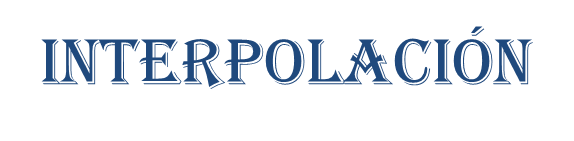

El objetivo es ajustar una función que por combinaciones lineales logre pasar por todos los puntos.

Definición—***Interpolación***. Las técnicas de interpolación ajustan un polinomio de menor grado que pasa por los puntos tabulados, esto quiere decir que, si sustituimos un valor de $x_i$  de la tabla, obtenemos la correspondiente $y_i$  de la tabla. \\

En general, la función tiene la forma:
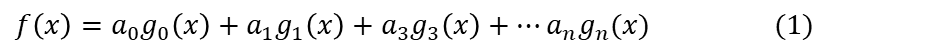

Donde las $a_i$  son factores a determinar y las $g_i(x)$ son funciones de una familia en particular. \\


**Familia de monomios**. Son los más utilizados ya que son fáciles de obtener y generan un polinomio. La desventaja es que los polinomios tienen comportamientos diferentes a los esperados, de acuerdo con los datos, cuando son de potencias altas: \\

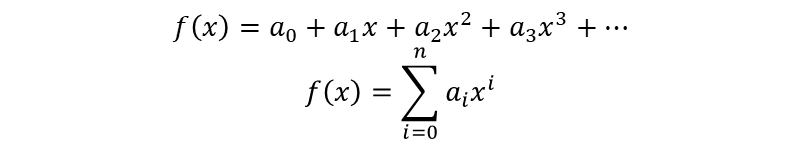

**Familia de funciones de Fourier:** 1, $sin⁡(x)$, $cos⁡(x)$, $sin⁡(2x)$ que al combinarse linealmente como en la ecuación 2.1 tenemos:

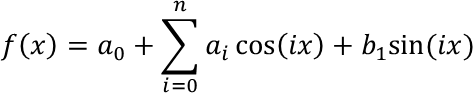

**Familia de funciones exponenciales:** 1, $e^x$, $e^2x$, $e^3x$  que al llevarla a la forma general de la ecuación 1 se tiene:

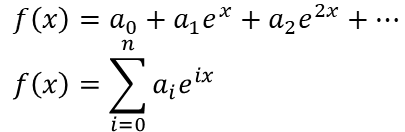

La técnica de ajustar un polinomio a los datos es la más usada porque se adapta a muchos casos simples, las otras técnicas se usan para un conjunto de datos que tienen un comportamiento cíclico o exponencial.


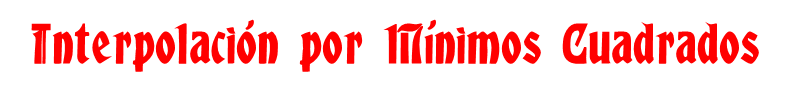

• Es una técnica de Análisis Numérico en la que, dados un conjunto de pares (o ternas, etc), se intenta encontrar la función que mejor se aproxime a los datos (un “mejor ajuste”). \\

• En su forma más simple, intenta minimizar la suma de cuadrados de las diferencias ordenadas (llamadas residuos) entre los puntos generados por la función y los correspondientes en los datos.


***VENTAJAS***  \\

• Es objetivo, sólo depende de los resultados experimentales.
• Es reproducible, proporciona la mismaa ecuación, no importa quién realice el análisis.
• Proporciona una estimación probabilística de la ecuación que representa a unos datos experimentales.
• Proporciona intervalos pequeños de error.

***RESTRICCIONES***  \\

• Sólo sirve para ajustar modelos lineales. \\
• Requiere tener, al menos, diez mediciones bajo las mismas circunstancias experimentales.  \\
• Tales resultados deben estar descritos por una distribución de probabilidad conocida. La más común es la distribución normal o gaussiana.  \\
• Se requiere de algún equipo de cálculo, de lo contrario, es muy engorroso.


# **Ejemplo 4.0 **

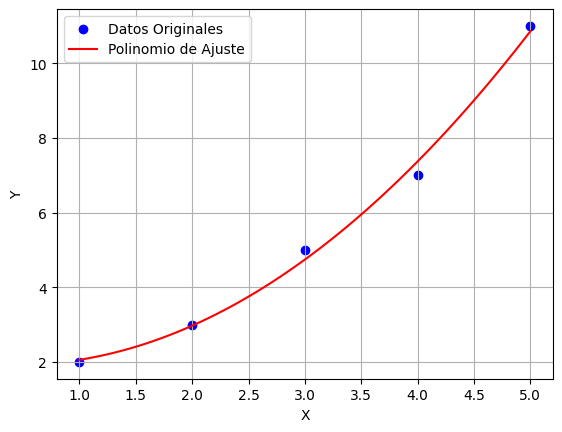

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Grado del polinomio de ajuste
grado = 2

# Realizar la interpolación por mínimos cuadrados
coeficientes = np.polyfit(x, y, grado)
polinomio = np.poly1d(coeficientes)

# Crear un conjunto de puntos para representar el polinomio ajustado
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polinomio(x_fit)

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x, y, label='Datos Originales', color='b')
plt.plot(x_fit, y_fit, label='Polinomio de Ajuste', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

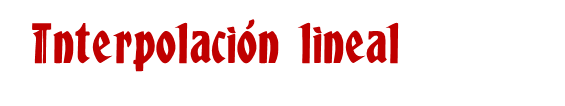

La interpolación lineal ajusta un polinomio de grado 1 a los datos tabulados. Usamos entonces la forma de una ecuación lineal \\
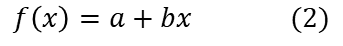

Para lograr una interpolación lineal (polinomio de grado 1), se requieren dos puntos de la tabla \\

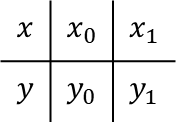

Como indica la definición se debe encontrar un polinomio que pase por los puntos tabulados. Entonces, si sustituimos $x_0$ en $f(x)$ (Ecuación lineal 2) debemos obtener $y_0$.

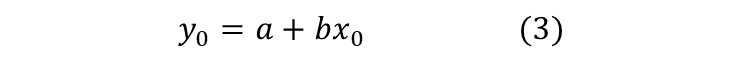

Y, si sustituimos $x_1$  en la ecuación 2, entonces deberíamos obtener $y_1$

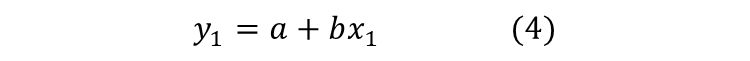

Tenemos dos ecuaciones (3 y 4) y dos incógnitas (a y b), entonces procedemos a resolver el sistema de 2x2. \\

Despejamos $a$ de ecuación 3

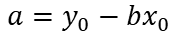                                    

Sustituimos $a$ en $y_1$

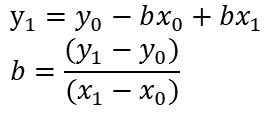

Sustituimos $a$ en ecuación 2

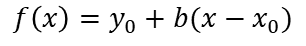

Finalmente sustituimos $b$ en la ecuación anterior

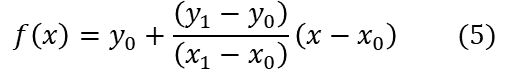

La ecuación 5 se usa para hacer la interpolación lineal en el intervalo $𝑥𝜖[x_0,x_1]$, $x$ es el valor que se desea interpolar. En general, para un par de puntos $[x_i,y_i]$; $[x_{i+1}$,$y_{i+1}]$ la ecuación sería

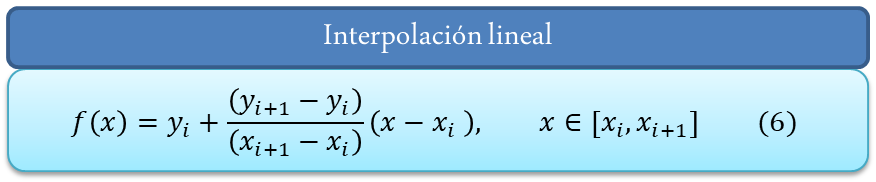



# **Ejemplo 4.1 —** *Interpolación lineal carbonato de sodio*. La medición de la densidad del carbonato de sodio a distintas concentraciones a temperatura constante genera los siguientes datos.

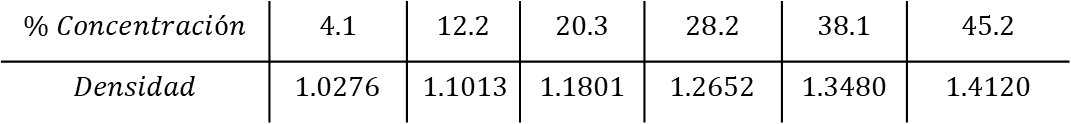

Obtener la densidad del carbonato de sodio a una concentración del 15%.
Observamos que la densidad del carbonato de sodio para una concentración del 15% no existe en los datos tabulados, también observamos que los datos más cercanos son

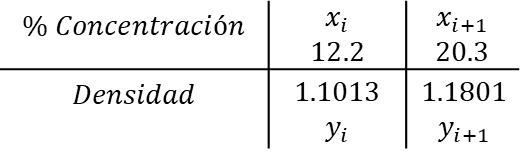

Sustituimos los valores correspondientes en la ecuación anterior donde $x=15$ (dato a interpolar)

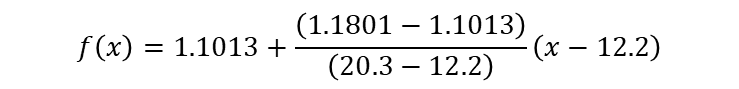

Esta ecuación es válida solo para $𝑥∈[12.2,20.3]$ fuera de ese intervalo no estaríamos hablando de una interpolación. Sustituimos entonces el valor de $x=15$

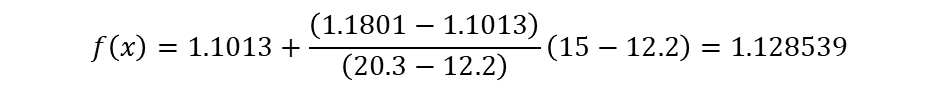

Por lo tanto, de acuerdo con la interpolación lineal, la densidad del carbonato de sodio al $15%$ de concentración es $1.128539$.

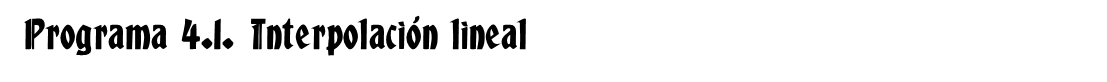

Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]
y el dato interpolado 15 ∈ [12.2,20.3]


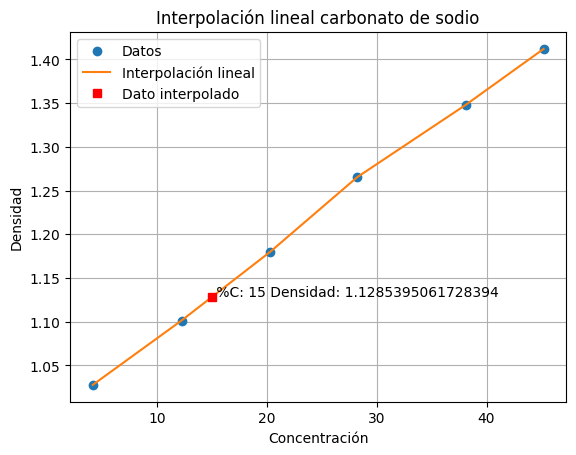

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x=np.array([4.1,12.2,20.3,28.2,38.1,45.2])
y=np.array([1.0276,1.1013,1.1801,1.2652,1.3480,1.4120])

xfino=np.linspace(4.1,45.2,100)
yi=interpolate.interp1d(x,y,kind='linear')

xi=15
yii=yi(xi)

plt.plot(x,y,'o',xfino,yi(xfino),'-',xi ,yii,'sr')
plt.legend(['Datos', 'Interpolación lineal', 'Dato interpolado'])
plt.title('Interpolación lineal carbonato de sodio')
plt.xlabel('Concentración')
plt.ylabel('Densidad')
plt.text(xi,yii,' %C: '+ str(xi) + ' Densidad: ' + str(yii))
print('Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]')
print('y el dato interpolado 15 ∈ [12.2,20.3]')
plt.grid(True)
plt.show()

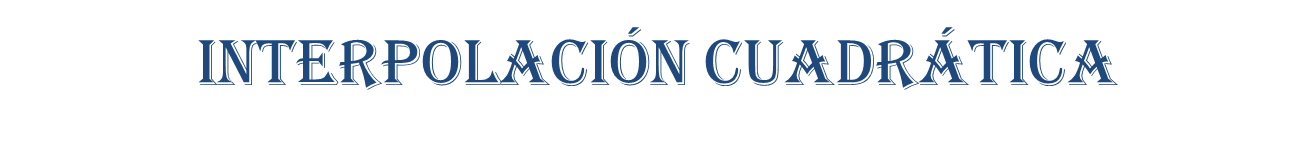

La interpolación lineal supone un comportamiento lineal entre $y_i$ y $y_{i+1}$ y esto no es necesariamente así, para los casos donde suponemos un comportamiento cuadrático se debe ajustar un polinomio de segundo grado que pase por los puntos. Si tomamos sólo dos puntos, entre ellos puede pasar un número infinito de polinomios de grado 2. La interpolación exige que el polinomio que une los puntos sea único y de menor grado, entonces se requieren 3 puntos para cumplir esta restricción.

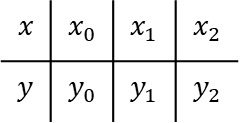

Similar a la interpolación lineal donde ajustamos un polinomio de primer grado, ahora ajustamos un polinomio de segundo grado a los puntos tabulados, el
polinomio debe pasar por los tres puntos, por lo que el polinomio es único.

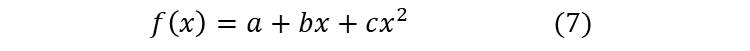

Si sustituimos $x_i$ en la ecuación 2.7 se debe obtener $y_i$

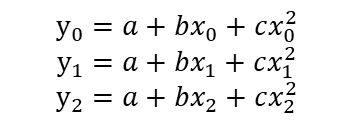

Tenemos un sistema de tres ecuaciones con tres incógnitas (a,b,c). La forma de la ecuación 2.7 nos lleva a resolver un sistema de 3x3, si pensamos en una interpolación cúbica tendríamos que resolver un sistema de 4x4, y si pensamos en una interpolación de grado $n$, entonces tendríamos que resolver un sistema $(n+1)x(n+1)$, lo cual no es conveniente. Trabajemos con una ecuación similar a la ecuación 2.7 que tome en cuenta pasar por los tres puntos $(x0,y0)$; $(x1,y1), (x2,y2)

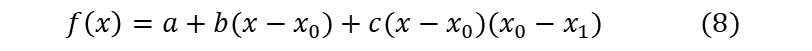

Debemos lograr que la ecuación 2.8 pase por los tres puntos, entonces si sustituimos $x_0$ debemos obtener $y_0$.

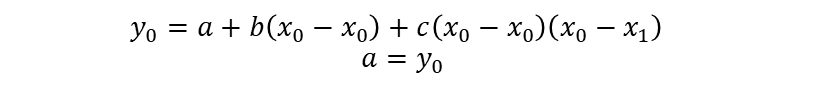

Si sustituimos $x_1$ debemos obtener $y_1$, sabemos ya que $a=y_0$

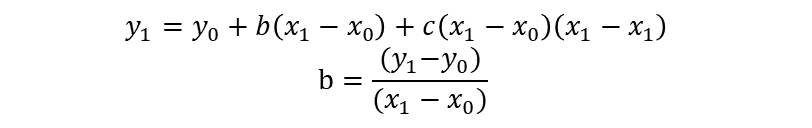

Ya sabíamos los valores de estos términos $a$ y $b$ por la interpolación lineal, ahora sustituimos $x_2$ para obtener $y_2$, sustituyendo también los valores obtenidos de $a$ y $b$.

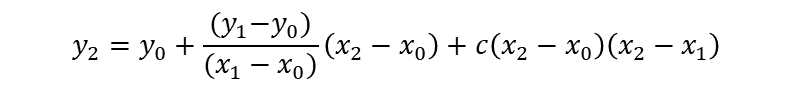

Despejando $c$ ya tenemos los tres coeficientes que necesitamos para la ecuación 2.8, pero lo vamos a hacer de tal manera que los términos queden expresados al final como diferencias divididas. \\

Despejamos el último término donde se encuentra $c$

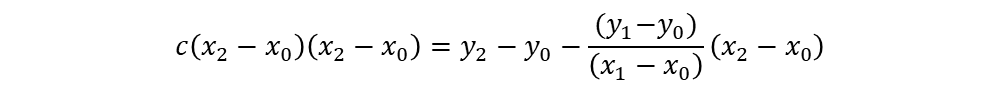

Sumamos un cero del lado derecho $-y_1+y_1$

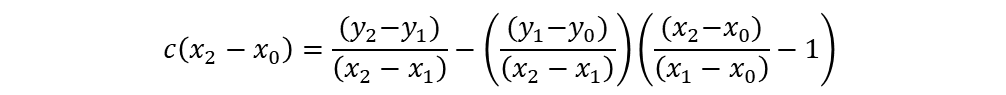

El término 1 lo sustituimos por otro $(𝑥_1−𝑥_0)/(𝑥_1−𝑥_0)$

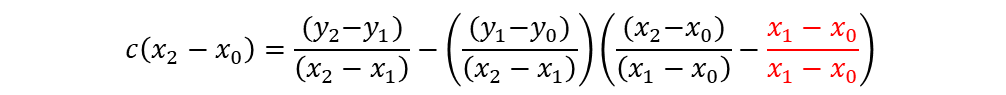

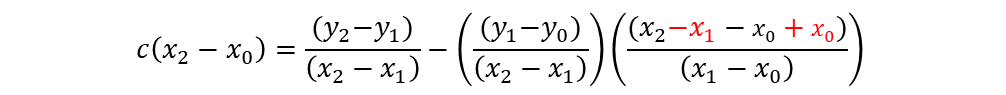

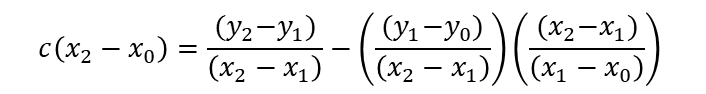

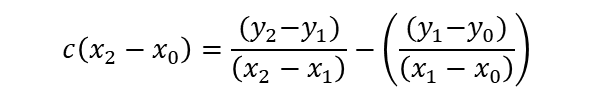

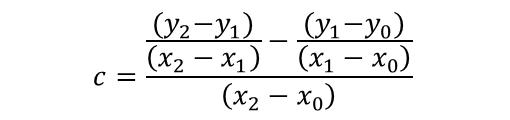

Por último, sustituimos $a$, $b$ y $c$ en la ecuación 2.8 para obtener la ecuación de la **interpolación cuadrática**.

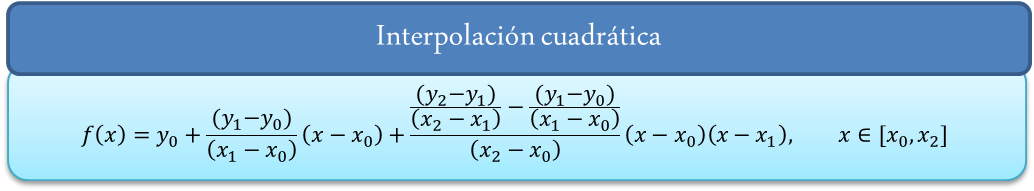

Los dos primeros términos son iguales a la interpolación lineal, el tercer término es el término cuadrático que da la curvatura entre los puntos de la tabla. El segundo término expresa la pendiente del comportamiento lineal, que es la “derivada” expresada como una diferencia dividida, y el tercer término es una diferencia de diferencias, es decir, la segunda derivada. Es precisamente como está construida la serie de Taylor de la ecuación 1.7.

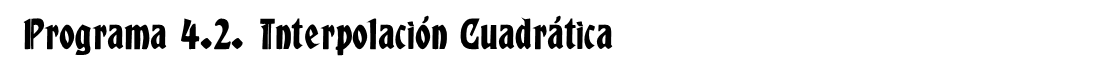

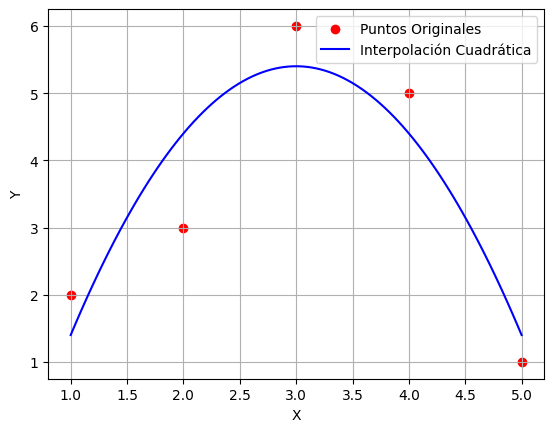

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 6, 5, 1])

# Realizar interpolación cuadrática
coefficients = np.polyfit(x, y, 2)  # Ajustar una función cuadrática (polinomio de grado 2)

# Crear una función cuadrática a partir de los coeficientes
quadratic_function = np.poly1d(coefficients)

# Generar puntos para la curva de interpolación
x_interp = np.linspace(min(x), max(x), 100)
y_interp = quadratic_function(x_interp)

# Graficar los puntos originales y la interpolación cuadrática
plt.scatter(x, y, label="Puntos Originales", color='red')
plt.plot(x_interp, y_interp, label="Interpolación Cuadrática", color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


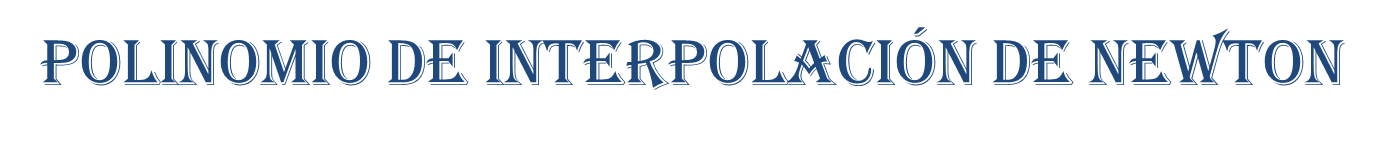

Como observamos en la interpolación lineal (ecuación 2.2) y la interpolación cuadrática (ecuación 2.9) cada término que se va aumentando es una diferencia dividida de orden mayor. El polinomio de interpolación polinómica para $n$ datos tiene la forma:
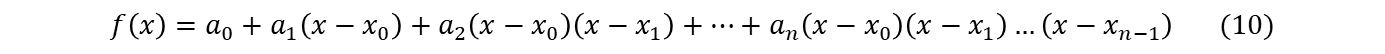

Donde

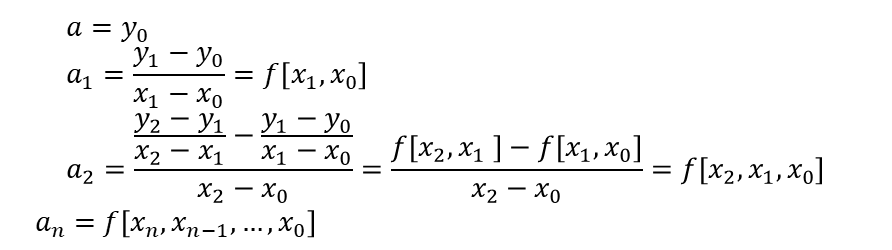

sustituyendo las diferencias en la ecuación 2.10 obtenemos

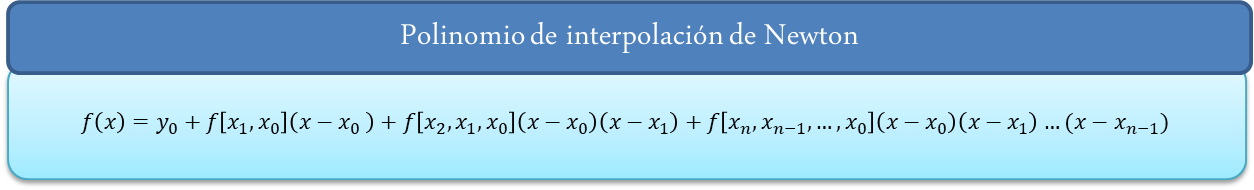

donde $f[x_1,x_0], f[x_2,x_1,x_0], f[x_n,x_{n-1},...,x_0]$ son las diferencias divididas. Para calcular la segunda diferencia $(f[x_2,x_1]-f[x_1,x_0])/(x_2-x_1)$ se usa el valor de la primera diferencia $f[x_1,x_0]$ la cual fue calculada anteriormente, entonces para hacer un cálculo eficiente, necesitamos usar el resultado de la primera diferencia en la segunda diferencia para no volver a calcularlo. Se construye entonces la tabla de diferencias (Cuadro 2.1).


La tabla de diferencias contiene todos los valores para construir el polinomio de interpolación.

# **Ejemplo 4.3 —** *Interpolación polinómica de Newton*. En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

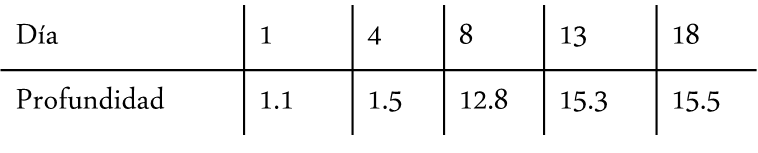

Calcular la profundidad del agua en el día 3. \\

**Solución.-** Usar la interpolación polinómica de Newton con todos los puntos de la tabla.


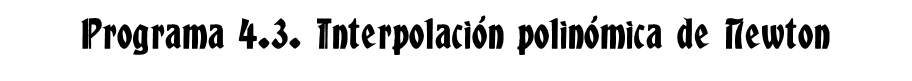

[[ 1.10000000e+00  1.33333333e-01  3.84523810e-01 -5.35714286e-02
   4.04341737e-03]
 [ 1.50000000e+00  2.82500000e+00 -2.58333333e-01  1.51666667e-02
   0.00000000e+00]
 [ 1.28000000e+01  5.00000000e-01 -4.60000000e-02  0.00000000e+00
   0.00000000e+00]
 [ 1.53000000e+01  4.00000000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.55000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
-0.3424369747899161
La salida nos muestra el resultado de la interpolación, la profundidad es
-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto
del problema, la altura del agua no puede ser negativa; sin embargo, es el
resultado de ajustar un polinomio con todos los datos de la tabla.


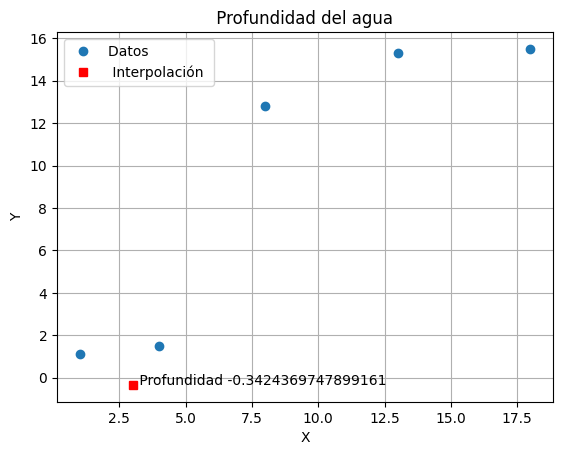

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size

t=np.zeros((n,n))
t[:,0]= y

# Genera la tabla de diferencias
for c in range(1,n):
    for r in range(0,n-c):
        t[r,c]=(t[r+1,c-1]-t[r,c-1])/(x[r+c]-x[r])
print(t)

# calcula la interpolacion de xi
xi=3
xt=1
yi=t[0,0]

for k in range(0,n-1) :
    xt = xt*(xi-x[k])
    yi = yi+t[0,k+1]*xt

print(yi)

plt.plot(x,y,'o')
plt.plot(xi,yi,'sr')
plt.text(xi+0.1,yi,' Profundidad ' + str (yi))
plt.title(' Profundidad del agua ')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Datos ',' Interpolación '])
plt.grid(True)

print('La salida nos muestra el resultado de la interpolación, la profundidad es')
print('-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto')
print('del problema, la altura del agua no puede ser negativa; sin embargo, es el')
print('resultado de ajustar un polinomio con todos los datos de la tabla.')
plt.show()

In [80]:
print('------- Polinomio de Interpolación de Newton -------')
n = int(input('Ingrese el grado del polinomio a evaluar: '))+1

matriz = [0.0] * n
for i in range(n):
    matriz[i] = [0.0] * n

vector = [0.0] * n

for i in range(n):
    x = float(input('Introduce el valor de x: '))
    y = float(input('Introduce el valor para f['+str(x)+']: '))
    vector[i] = x
    matriz[i][0] = y

punto_a_evaluar = float(input('Ingrese el punto a evaluar: '))

print('------------------------------')
print('------- Calculando ... -------')

for i in range(1,n):
    for j in range(i,n):
         matriz[j][i] = ( (matriz[j][i-1]-matriz[j-1][i-1]) / (vector[j]-vector[j-i]))
print(matriz)
print(vector)

aprx = 0
mul = 1.0
for i in range(n):
    mul = matriz[i][i];
    for j in range(1,i+1):
        mul = mul * (punto_a_evaluar - vector[j-1])
    aprx = aprx + mul

print('------------------------------')
print('El valor aproximado de f(',punto_a_evaluar,') es: ', aprx)
#x=np.array([1,4,8,13,18])
#y=np.array([1.1,1.5,12.8,15.3,15.5])

------- Polinomio de Interpolación de Newton -------
Ingrese el grado del polinomio a evaluar: 4
Introduce el valor de x: 1
Introduce el valor para f[1.0]: 1.1
Introduce el valor de x: 4
Introduce el valor para f[4.0]: 1.5
Introduce el valor de x: 8
Introduce el valor para f[8.0]: 12.8
Introduce el valor de x: 13
Introduce el valor para f[13.0]: 15.3
Introduce el valor de x: 18
Introduce el valor para f[18.0]: 15.5
Ingrese el punto a evaluar: 3
------------------------------
------- Calculando ... -------
[[1.1, 0.0, 0.0, 0.0, 0.0], [1.5, 0.1333333333333333, 0.0, 0.0, 0.0], [12.8, 2.825, 0.38452380952380955, 0.0, 0.0], [15.3, 0.5, -0.25833333333333336, -0.053571428571428575, 0.0], [15.5, 0.039999999999999855, -0.04600000000000001, 0.015166666666666667, 0.004043417366946779]]
[1.0, 4.0, 8.0, 13.0, 18.0]
------------------------------
El valor aproximado de f( 3.0 ) es:  -0.3424369747899161


El polinomio de Newton es: 1.1 + 0.1333333333333333 (x-x0) + 0.38452380952380955 (x-x0)(x-x1) + -0.053571428571428575 (x-x0)(x-x1)(x-x2) + 0.004043417366946779 (x-x0)(x-x1)(x-x2)(x-x3)


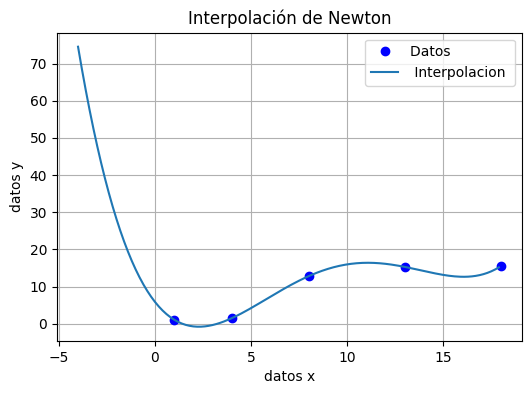

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    #Función para calcular la tabla de diferencias divididas
    n = len(y)
    coef = np.zeros([n, n])
    # La primera columna es y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    #Evaluar el polinomio de newton en x
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

#Datos
x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])

# Obtener los coeficientes de diferencia dividida
a_s = divided_diff(x, y)[0, :]
print('El polinomio de Newton es:', a_s[0],'+', a_s[1],'(x-x0)','+',a_s[2],'(x-x0)(x-x1)','+',a_s[3],'(x-x0)(x-x1)(x-x2)','+',a_s[4],'(x-x0)(x-x1)(x-x2)(x-x3)')

# Evaluar nuevos puntos de datos
x_new = np.arange(-4, 18, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Interpolación de Newton')
plt.legend([ 'Datos ',' Interpolacion '])
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.grid( True )
plt.show()

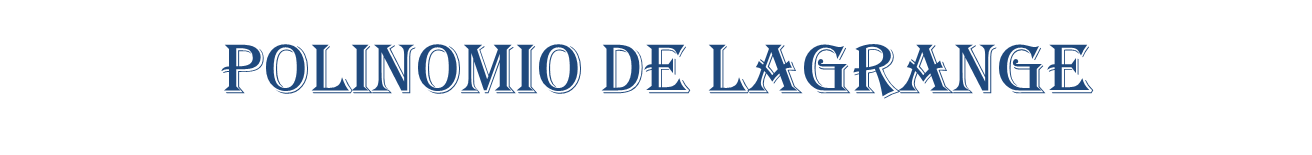

La interpolación de Lagrange ajusta un polinomio a los datos, de tal manera que pasa por cada uno.
Como lo precisan los métodos de interpolación, se trata de ajustar un polinomio de menor grado que toca todos los puntos y el polinomio es único. Como el polinomio es único, entonces tanto la interpolación de Newton como la interpolación de Lagrange obtienen el mismo polinomio, sólo que expresado de una manera diferente. Otra diferencia es que el polinomio de Lagrange obtiene el
polinomio en un solo paso, la interpolación de Newton primero obtiene la tabla de diferencias para construir el polinomio de interpolación. \\

La forma del polinomio que usa la interpolación lineal de Lagrange entre dos puntos es la siguiente:

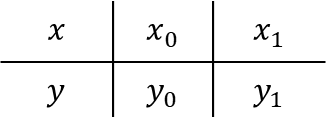

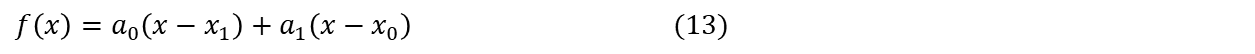

Como en los casos anteriores, para asegurar que el polinomio pasa por los puntos tabulados, si sustituimos $x_0$ en la ecuación 2.13 debemos obtener $y_0$

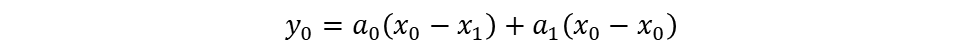

de aquí despejamos $a_0$

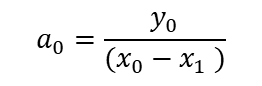

si sustituimos $x_1$ en la ecuación 2.13, debemos obtener $y_1$

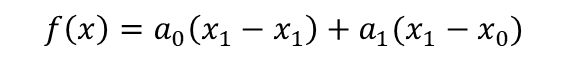

de aquí despejamos $a_1$

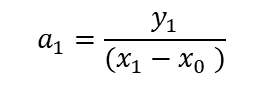


finalmente sustituimos $a_0$ y $a_1$ en la ecuación 2.13 para obtener

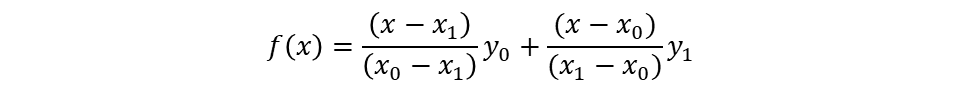

En la interpolación cuadrática o de segundo grado se ajusta un polinomio de grado 2 que pasa por los tres puntos:

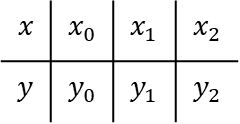

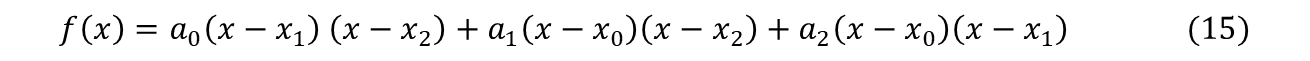


Para asegurar que el polinomio pasa por los tres puntos tabulados, sustituimos $x_0$ en la ecuación 2.15, debemos obtener $y_0$

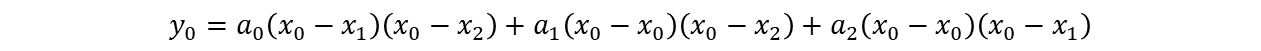

de aquí despejamos $a_0$

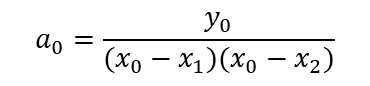

si sustituimos $x_1$ en la ecuación 2.15, debemos obtener $y_1$

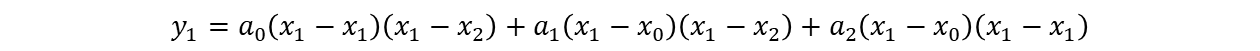

de aquí despejamos $a_1$

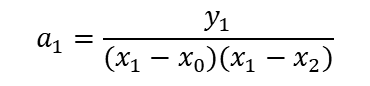

Sustituimos $x_2$ en la ecuación 2.15, debemos obtener $y_2$

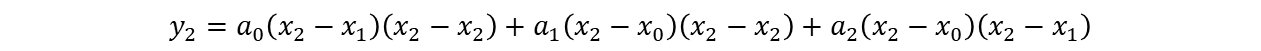

de aquí despejamos $a_2$

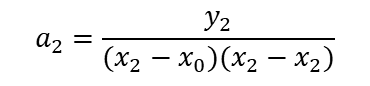

finalmente, sustituimos $a_0$, $a_1$ y $a_2$ en la ecuación 2.15 para obtener la ecuación de la interpolación de Lagrange de segundo grado.

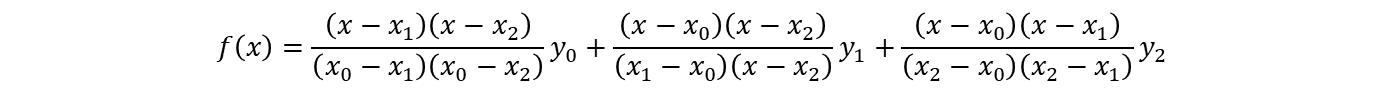

La construcción de la interpolación polinómica de Newton para $n$ puntos, observando el comportamiento de la interpolación lineal y cuadrática anteriores (ecuaciones 2.13 y 2.15) podemos deducir que:

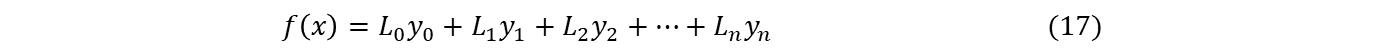


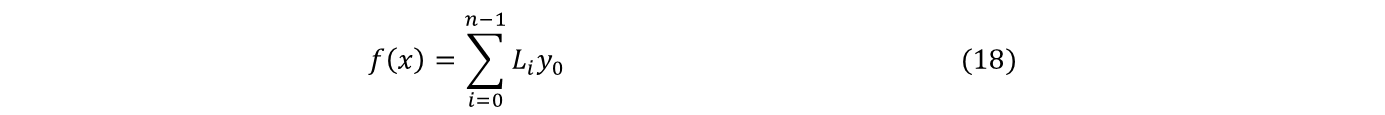

Donde las $L_i$ son los factores de Lagrange que se calculan como:

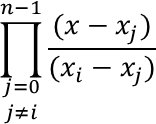

La ecuación de la interpolación polinómica de Lagrange es:

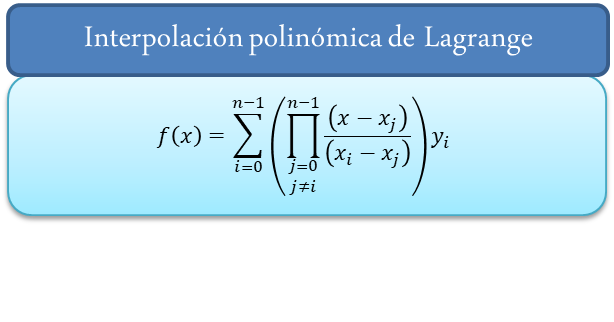

Hay que recordar que, tanto la interpolación polinómica de Newton como la interpolación polinómica de Lagrange, ambas obtienen el mismo polinomio de interpolación, sólo que se expresan y se obtienen de maneras diferentes, pero algebraicamente son el mismo polinomio y, por lo tanto, se tienen los mismos resultados.

# **Ejemplo 4.4 —** *Interpolación polinómica de Lagrange.* En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

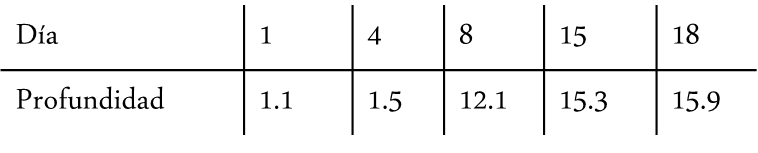

Calcular la profundidad del agua en el día 3. \\

**Solución** \\
Usemos la interpolación polinómica de Newton con todos los puntos de la tabla

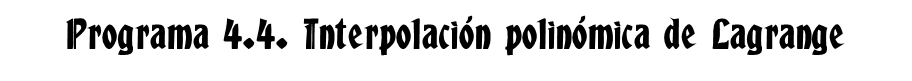

-0.34243697478991597
-0.3424369747899192


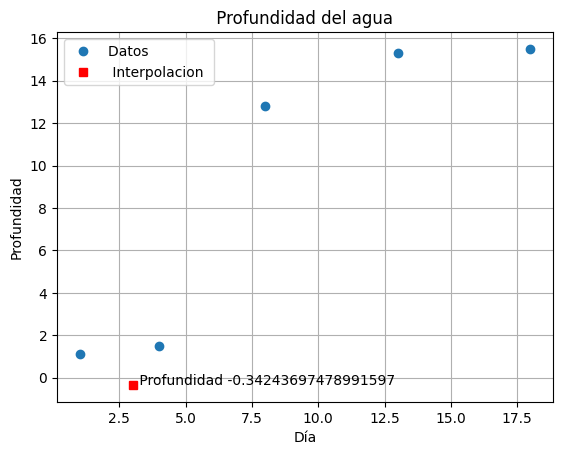

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size
xi=3
yi=0
# Calcula los factores de Lagrange y hace la suma
for i in range(0,n):
    producto = y[i]
    for j in range(0,n):
      if i!= j:
          producto = producto * (xi - x[j]) /(x[i]-x[j]);
    yi = yi + producto

print(yi)
f= interpolate.lagrange(x,y) # usando la funcion de Lagrange de scipy
print(f(xi))

plt.plot(x,y, 'o')
plt.plot(xi ,yi , 'sr ')
plt.text(xi +0.1 ,yi , ' Profundidad ' + str (yi))
plt.title( ' Profundidad del agua ')
plt.xlabel("Día")
plt.ylabel("Profundidad")
plt.legend([ 'Datos ',' Interpolacion '])
plt.grid( True )
plt.show()

El polinomio de Newton es: 2.0 -2.0 (x-x0) -1.0 (x-x0)(x-x1)


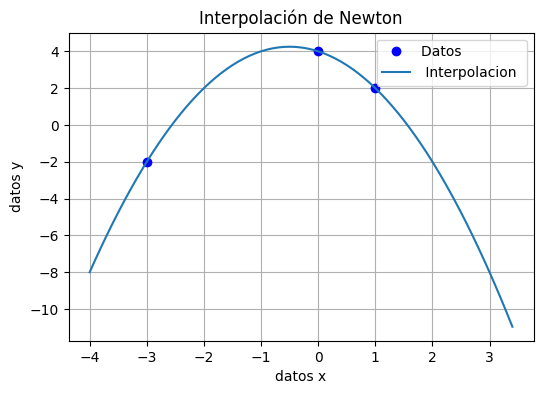

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    #Función para calcular la tabla de diferencias divididas
    n = len(y)
    coef = np.zeros([n, n])
    # La primera columna es y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    #Evaluar el polinomio de newton en x
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

#Datos
x = np.array([1, 0, -3])
y = np.array([2, 4, -2])

# Obtener los coeficientes de diferencia dividida
a_s = divided_diff(x, y)[0, :]
print('El polinomio de Newton es:', a_s[0],+ a_s[1],'(x-x0)',+a_s[2],'(x-x0)(x-x1)')

# Evaluar nuevos puntos de datos
x_new = np.arange(-4, 3.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Interpolación de Newton')
plt.legend([ 'Datos ',' Interpolacion '])
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.grid( True )
plt.show()

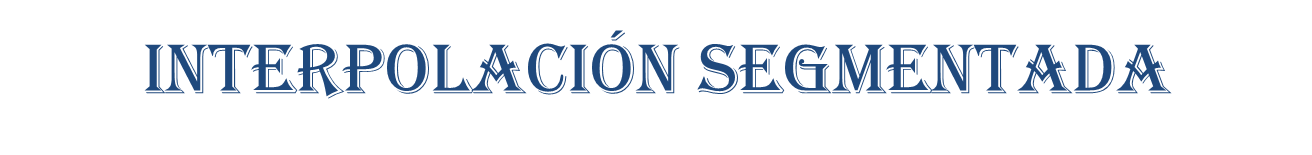

Esta interpolación se llama interpolación segmentaria o interpolación por splines. La idea central es que en vez de usar un solo polinomio para interpolar los datos, podemos usar segmentos de polinomios y unirlos adecuadamente para formar nuestra interpolación.


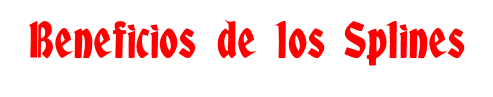



Los Splines surgen en la búsqueda de soluciones a los problemas con el resto de
interpolaciones, como por ejemplo:

1.   En ciertos casos, con la interpolación polinomial obtenemos un polinomio de grado elevado al aumentar el número de puntos de interpolación. Esto puede
desviar mucho la curva que pasa por los puntos dados, provocando problemas
de estabilidad y grandes oscilaciones, huyendo de la solución deseada. Lo que
se denomina fenómeno de Runge.
2.   Su cálculo exige realizar un gran número de iteraciones aritméticas para hallar la solución; como por ejemplo Lagrange que obliga a ejecutar 2 bucles
entrelazados, uno para el sumatorio y otro para el productorio.
Puede darse el caso que la solución encontrada sea una aproximación que
pueda no pasar por los puntos requeridos, como por ejemplo la interpolación
por Mínimos Cuadrados.
3.   Si deseamos añadir o suprimir un punto del conjunto de datos, a una solución encontrada, hay que volver a hacer todos los cálculos del método. En otras palabras, en algunos procesos de interpolación, las modificaciones locales afectan globalmente al polinomio solución.

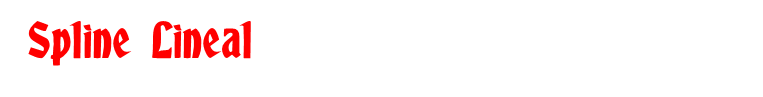

Los métodos revisados hasta el momento ajustan un polinomio de menor grado que pasa por todos los puntos. Si los n puntos tienen una variación tal que puede generar un polinomio de grado $n-1$, creando *oscilaciones* entre los puntos, entonces los puntos que se interpolan muestran un comportamiento distinto al resto. \\

El fenómeno de Runge es un problema que sucede cuando se usa interpolación polinómica con polinomios de grado alto. Lo descubrió Carle David Tolmé Runge, cuando exploraba el comportamiento de los errores al usar interpolación polinómica para aproximar determinadas funciones. \\

Considérese la función:
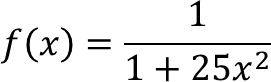

Runge descubrió que si se interpola esta función en puntos equidistantes entre -1 y 1, la interpolación resultante oscila hacia los extremos del intervalo.

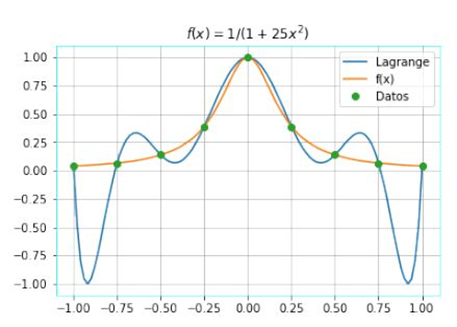

La oscilación se puede minimizar usando nodos de Chebyshev en lugar de equidistantes. En este caso, se garantiza que el error máximo disminuye al crecer el orden polinómico. El fenómeno demuestra que los polinomios de grado alto no son, en general, aptos para la interpolación. Este problema se puede evitar usando curvas spline.

Los trazadores o splines generan un polinomio de un grado menor entre los puntos, de tal manera que el comportamiento no debe rebasar el grado del trazador que se utiliza.

**Definición 4.1—** *Spline lineal*. El spline lineal o trazador lineal ajusta un polinomio de grado 1 entre cada par de puntos, de tal manera que el comportamiento entre ellos no puede ser mayor del grado 1. \\

La expresión que define el trazador lineal es una función a trozos, donde se indica el polinomio de
grado 1 que aplica en cada intervalo de $[𝑥_𝑖;𝑥_{(𝑖+1)}]$.

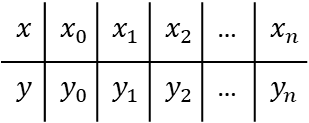



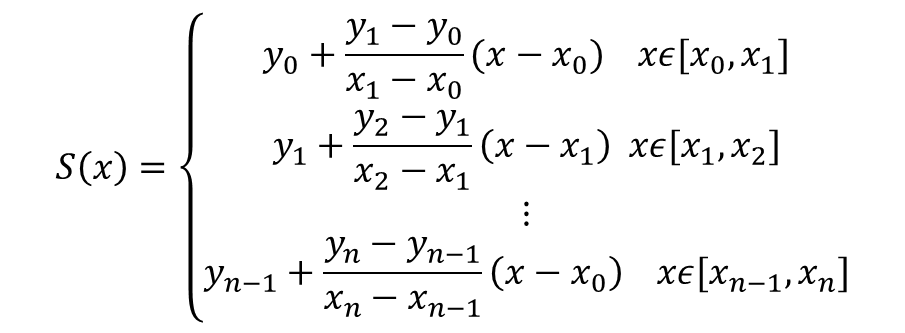

Aplicar el trazador lineal es como aplicar la interpolación lineal (ecuación en el cap. anterior.

**Ejemplo 4.5-** *Spline Lineal*

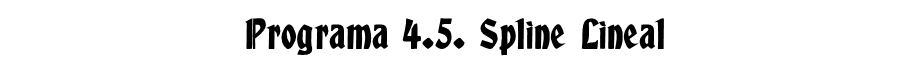

Polinomios por tramos o Spline lineal: 
  x = [0,1]
1.0*x
  x = [1,2]
3.0*x - 2.0
  x = [2,3]
5.0*x - 6.0
  x = [3,4]
7.0*x - 12.0
  x = [4,5]
9.0*x - 20.0


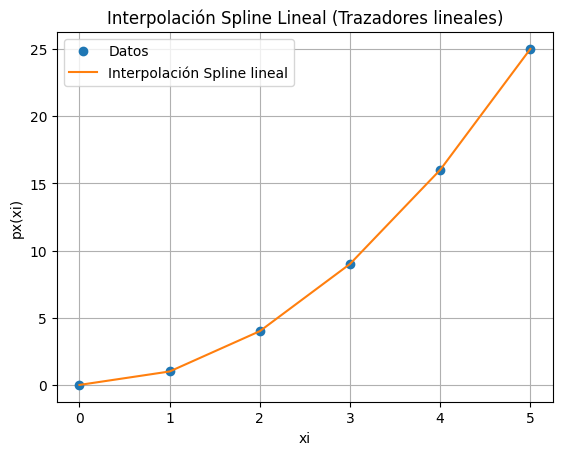

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def trazalineal(xi,fi):
    n = len(xi)
    x = sym.Symbol('x')
    px_tabla = []

    tramo = 1
    while not(tramo>=n):
        # con 1ra diferencia finita avanzada
        numerador = fi[tramo]-fi[tramo-1]
        denominador = xi[tramo]-xi[tramo-1]
        m = numerador/denominador
        pxtramo = fi[tramo-1] + m*(x-xi[tramo-1])
        px_tabla.append(pxtramo)
        tramo = tramo + 1

    return(px_tabla)

# PROGRAMA
# INGRESO , Datos de prueba
xi = [0, 1, 2, 3, 4, 5]
fi = [0, 1, 4, 9, 16, 25]

muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = trazalineal(xi,fi)

# SALIDA
print('Polinomios por tramos o Spline lineal: ')
for tramo in range(1,n,1):
    print('  x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'o', label='Datos')
plt.plot(xtraza,ytraza, label='Interpolación Spline lineal')
plt.title('Interpolación Spline Lineal (Trazadores lineales)')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.grid(True)
plt.show()

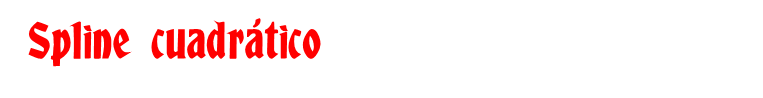

El spline cuadrático o trazador cuadrático ajusta un polinomio de segundo grado entre cada par de puntos.

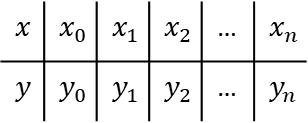

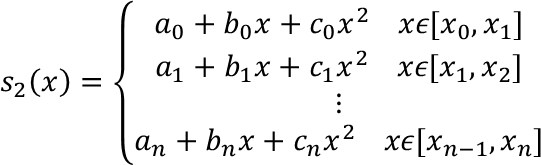

De tal manera que se tiene un sistema con $3n$ incógnitas, $𝑎_𝑖,𝑏_𝑖,𝑐_𝑖$ por cada ecuación. Como sólo se tienen $n$ ecuaciones, no es posible todavía conocer los valores de $𝑎_𝑖,𝑏_𝑖,𝑐_𝑖$, se requieren de $3n$ ecuaciones. \\

Dado que los polinomios deben pasar por todos los puntos tabulados, quiere decir que si sustituimos $x_0$ en el primer polinomio se obtiene $y_0$, y si sustituimos $x_1$ se obtiene $y_1$, así para todos los puntos.

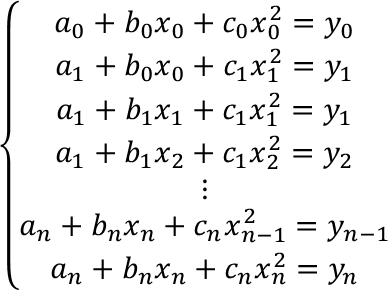

Se obtienen entonces $2n$ ecuaciones.

Uno de los requerimientos que se plantearon para los trazadores es que *suavizaran* las oscilaciones entre los puntos, la solución para los trazadores cuadráticos es proponer un polinomio de grado 2 entre cada par de puntos, como sabemos, hay infinidad de polinomios de grado 2 que unen dos puntos, se requiere de una condición más para hacer que los polinomios sean únicos. La condición que se usa es que la derivada del polinomio i-ésimo debe ser igual a la derivada del polinomio i-ésimo + 1. Esta solución, por un lado, asegura que la pendiente (derivada) del polinomio i-ésimo sea igual que la pendiente del siguiente polinomio, y no podrá suceder un comportamiento extraño entre cada par de puntos y, por otro lado, genera $n-1$ ecuaciones más. \\

Derivamos entonces el trazador cuadrático de cada intervalo.

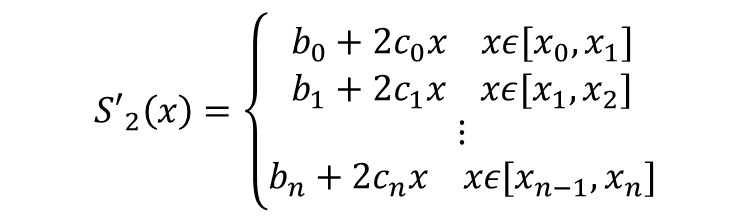


El primer polinomio $a_0 +b_0 x+ c_0 x^2$ se une con el segundo polinomio $a_0+b_0x+c_0x^2$ en el punto $x_1$, el segundo se une con el tercero en $x_2$, así sucesivamente hasta el penúltimo, que se une con el último en $x_{n-1}$ para $n+1$ puntos. Entonces, para asegurar que la derivada del primer polinomio se iguala a la del segundo, se evalúan ambas en el nodo que las comparte.


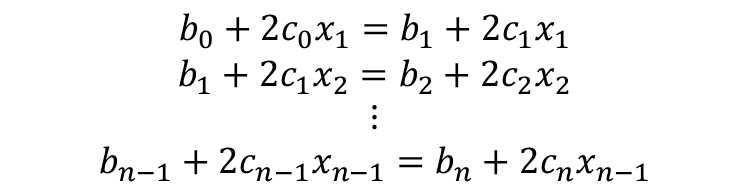

Se tienen ahora $n-1$ ecuaciones para generar un total de $3n-1$. \\

La derivada del primer polinomio no tiene manera de igualarse con una derivada anterior porque no existe un polinomio anterior, así que arbitrariamente decimos que la segunda derivada del primer polinomio es 0. Por lo tanto

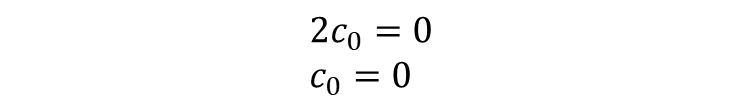


Se reduce entonces el sistema a $3n-1$ ecuaciones. Esto nos dice que el primer polinomio se trata de un polinomio de primer grado, ya que su ecuación es $a_0+b_0x$. \\

Se resuelve el sistema para obtener los coeficientes de las ecuaciones y conocer entonces los trazadores cuadráticos. Finalmente, se sustituye el valor de $x$ ubicando a qué intervalo pertenece y usar ese polinomio para calcular la interpolación.


Ejemplo 4.6

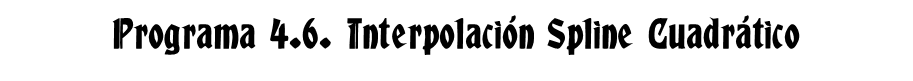

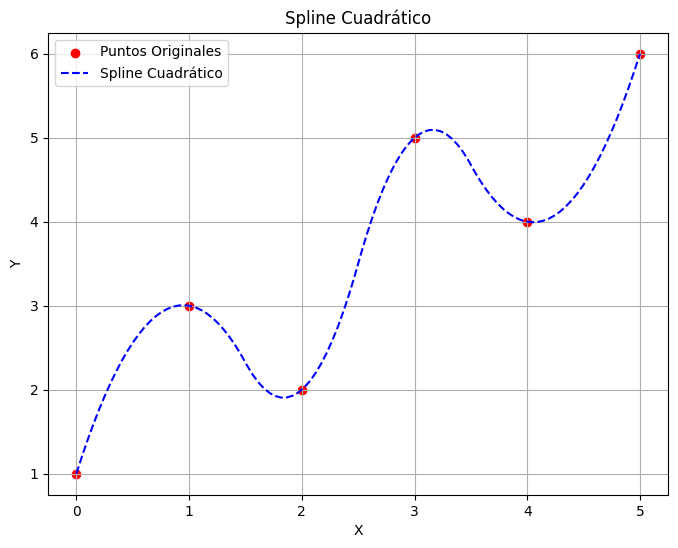

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Datos de ejemplo
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 4, 6])

# Crear una función interpolante cuadrática
f = interp1d(x, y, kind='quadratic')

# Crear puntos intermedios para el gráfico suave
x_new = np.linspace(0, 5, 100)
y_new = f(x_new)

# Trazar los puntos originales y el spline cuadrático
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Puntos Originales', color='red')
plt.plot(x_new, y_new, label='Spline Cuadrático', linestyle='--', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Spline Cuadrático')
plt.grid(True)
plt.show()

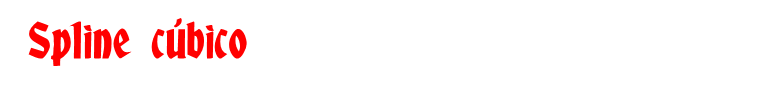

El spline cúbico o trazador cúbico ajusta un polinomio de tercer grado entre cada par de puntos.

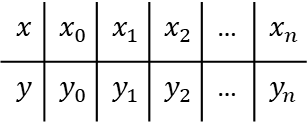

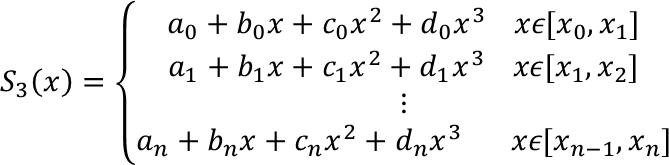

De tal manera que se tiene un sistema con $4n$ incógnitas, $a_i,b_i,c_i,d_i$ por cada ecuación. Se deben determinar los valores de $a_i,b_i,c_i,d_i$, para construir el trazador, por lo que se requiere de $4n$ ecuaciones. \\

Dado que los polinomios deben pasar por todos los puntos tabulados, quiere decir que si sustituimos $x_i$ en el polinomio correspondiente se obtiene $y_i$.

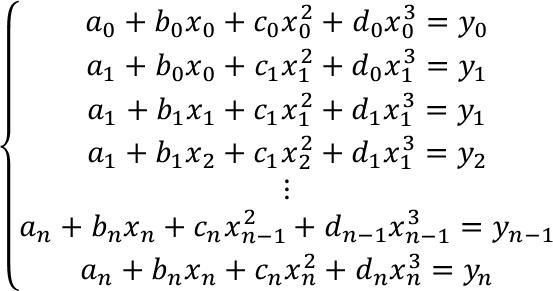

Se obtienen entonces $2n$ ecuaciones. \\

Se debe cumplir la condición: la primera derivada del polinomio i-ésimo debe ser igual a la derivada del polinomio i-ésimo + 1, evaluado en el nodo que comparten. \\

Derivamos entonces el trazador cúbico de cada intervalo.

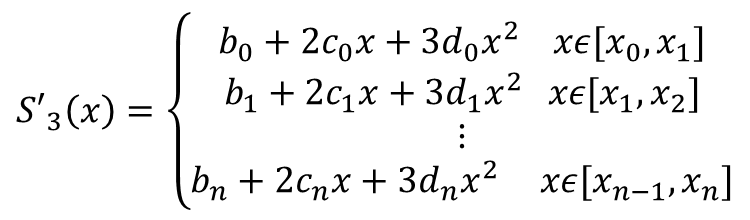

Se igualan las derivadas en cada nodo:

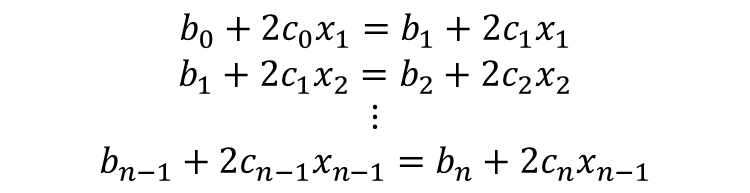

Se tienen ahora $n-1$ ecuaciones \\

Se debe cumplir también la condición: la segunda derivada del polinomio i-ésimo debe ser igual a la segunda derivada del polinomio i-ésimo + 1, evaluado en el nodo que comparten. \\

Obtenemos la segunda derivada del trazador cúbico de cada intervalo.

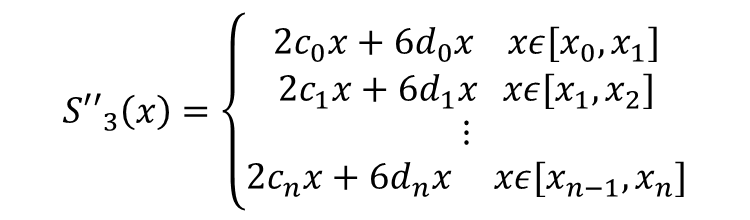


Se igualan las derivadas en cada nodo:


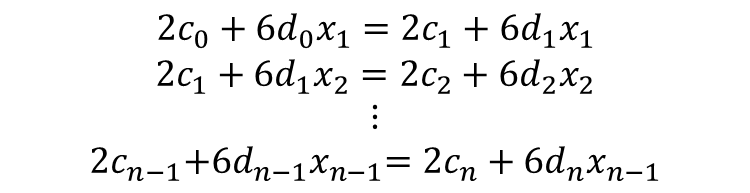


Y se obtienen $n-1$ ecuaciones, sólo se requieren 2 ecuaciones más para poder resolver el sistema.
Bajo el entendimiento que el primer polinomio no tiene un polinomio que lo antecede y el último polinomio no tiene otro que precede, por lo tanto, la segunda derivada evaluada en $x_0$ es cero y la
segunda derivada del último polinomio evaluado en $x_n$ también es cero y se tienen las dos ecuaciones que hacían falta.

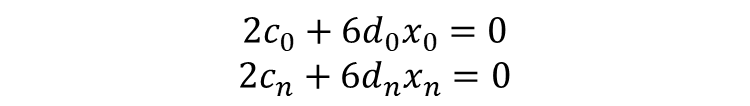


En total se tienen $4n$ ecuaciones para resolver el sistema y obtener las 4n coeficientes que requieren los $n$ polinomios. \\

Finalmente, se sustituye el valor de $x$ ubicando a qué intervalo pertenece y usar ese polinomio para calcular la interpolación.

# **Ejemplo 4.7 —** *Interpolación spline cúbico*. Usar la interpolación de spline cúbico en el problema de Runge. Se tiene la ecuación

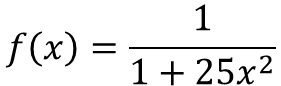

para generar los datos

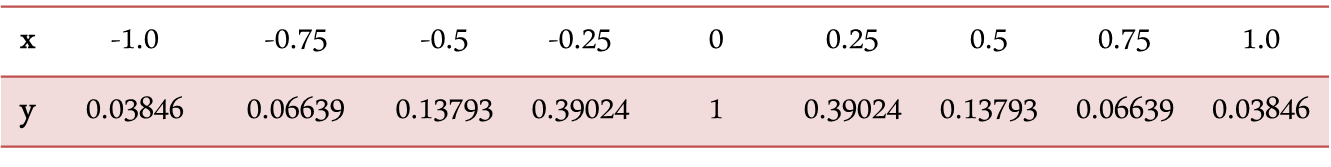

**Solución**

Usando la interpolación de spline cúbico y todos los puntos de la tabla.

0.046119184615384626


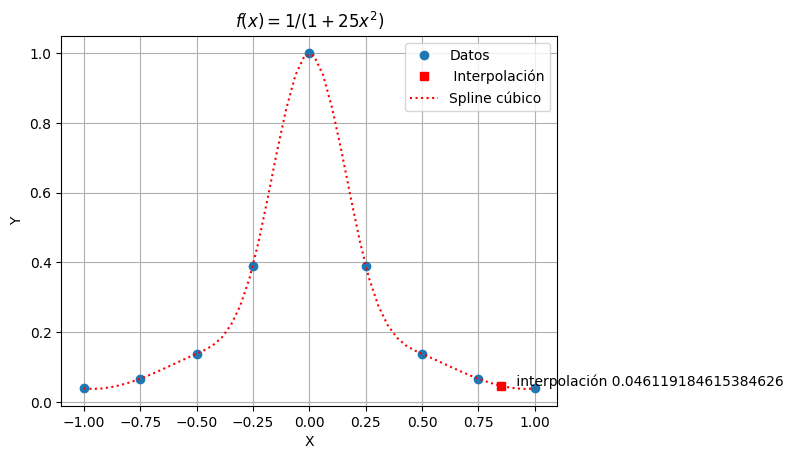

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x=np.array([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
y=np.array([0.03846,0.06639,0.13793,0.39024,1,0.39024,0.13793,0.06639,0.03846])

f=interpolate.interp1d(x,y,'cubic')

xs=np.linspace(-1,1,50)
ys=f(xs)
xi =0.85
yi=f(xi)

print(yi)

plt.plot(x,y,'o',label='Datos')
plt.plot(xi,yi,'sr',label=' Interpolación')
plt.plot(xs ,ys , 'r:',label='Spline cúbico')
plt.text(xi +0.05,yi ,' interpolación ' + str (yi))
plt.title('$f(x)=1/(1+25 x^2)$')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

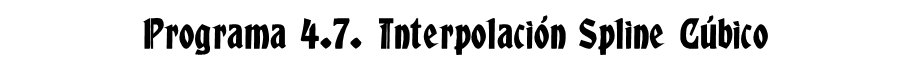

Polinomios por tramos: 
 x = [1.0,2.0]
-0.0857236959348446*x**3 + 0.257171087804534*x**2 + 0.528552608130311*x + 2.3
 x = [2.0,5.0]
0.0344030357722175*x**3 - 0.463589302437839*x**2 + 1.97007338861506*x + 1.3389861463435
 x = [5.0,6.0]
0.333135718701598*x**3 - 4.94457954637854*x**2 + 24.3750246083186*x - 36.002599219829
 x = [6.0,7.0]
-0.570591061798835*x**3 + 11.3225025026292*x**2 - 73.2274676857281*x + 159.202385368264
 x = [7.0,8.0]
0.149228528493742*x**3 - 3.79370889351486*x**2 + 32.5860120872806*x - 87.6957341020893
 x = [8.0,10.0]
0.0339752893722334*x**3 - 1.02763115459866*x**2 + 10.457390175951*x - 28.6860756718771
 x = [10.0,13.0]
-0.0228410898540091*x**3 + 0.67686022218861*x**2 - 6.58752359192173*x + 28.1303035543654
 x = [13.0,17.0]
0.0547099687169669*x**3 - 2.34763106207945*x**2 + 32.7308631035631*x - 142.249372126069
 x = [17.0,20.0]
-0.0932609516217995*x**3 + 5.19888587519763*x**2 - 95.5599248301474*x + 584.73175949829
 x = [20.0,23.0]
0.0453272705258336*x**3 - 3.1164074536

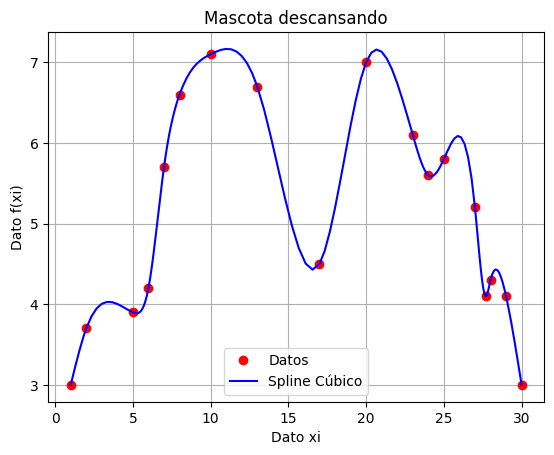

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)

    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
xi = np.array([1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30])
fi = np.array([3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='Datos')
plt.plot(xtraza,ytraza, label='Spline Cúbico'
         , color='blue')
plt.title('Mascota descansando')
plt.xlabel('Dato xi')
plt.ylabel('Dato f(xi)')
plt.legend()
plt.grid( True )
plt.show()

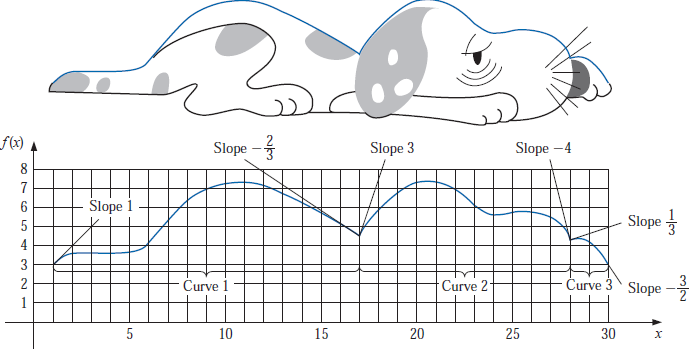